In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.shape

(150, 6)

In [9]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
data.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [11]:
data[data.duplicated()].sum()

,0
Id,0
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0
Species,0


In [12]:
round(data['Species'].value_counts(normalize = True)*100, 2)

,proportion
Species,
Iris-setosa,33.33
Iris-versicolor,33.33
Iris-virginica,33.33


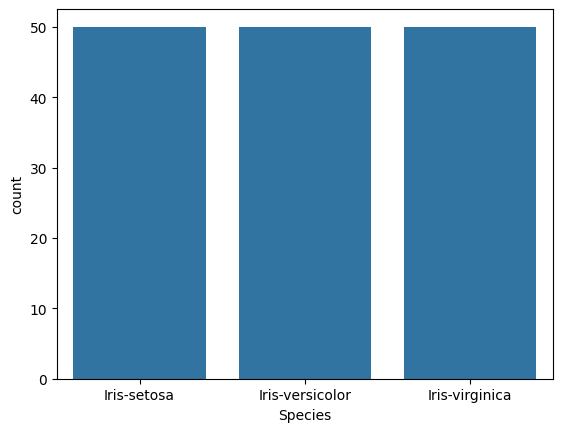

In [13]:
sns.countplot(x = data['Species'])
plt.show()


In [15]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [21]:
x = data.iloc[:,1:5]
y = data['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42, stratify = y)

print('Training data dimensions: ', x_train.shape, y_train.shape)
print('Testing data dimensions: ', x_test.shape, y_test.shape)
print(round(y_train.value_counts(normalize = True),2)) # without stratify this shows uneven data distribution as compared the original data


Training data dimensions:  (120, 4) (120,)
Testing data dimensions:  (30, 4) (30,)
Species
0    0.33
2    0.33
1    0.33
Name: proportion, dtype: float64


In [22]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)

x_test_scaled = scale.transform(x_test)

In [23]:
# KNN algo
error = []

for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance', n_jobs = -1)
  knn.fit(x_train_scaled, y_train)
  y_pred = knn.predict(x_test_scaled)
  error.append(np.mean(y_pred != y_test))

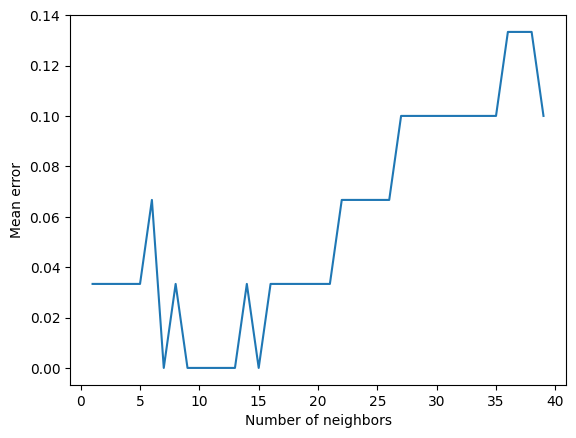

In [24]:
plt.plot(range(1,40),error)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean error')
plt.show()

In [25]:
k_value = range(1,22)
cv_score = []
for k in k_value:
  knn_cv = KNeighborsClassifier(n_neighbors = k, weights = 'distance', n_jobs = -1)
  scores =  cross_val_score(knn_cv, x_train_scaled, y_train, scoring = 'accuracy', n_jobs = -1)
  cv_score.append(scores.mean())

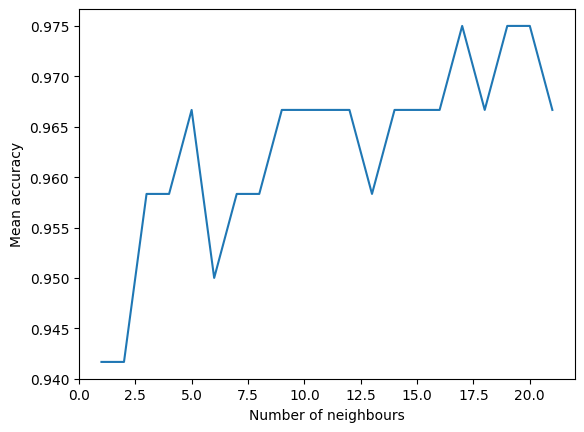

In [26]:
plt.plot(k_value , cv_score)
plt.xlabel('Number of neighbours')
plt.ylabel('Mean accuracy')
plt.show()

In [27]:
# model with optimum neighbours
model = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', n_jobs = -1)
model.fit(x_train_scaled, y_train)
print('Training Score: ', round(model.score(x_train_scaled, y_train)*100,2),'%')

Training Score:  100.0 %


In [28]:
y_pred = model.predict(x_test_scaled)
print('Testing Score: ', round(accuracy_score(y_test,y_pred)*100,2),'%')

Testing Score:  100.0 %


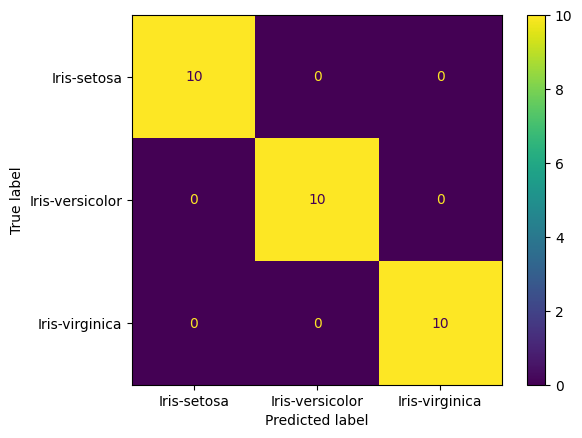

In [29]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])